In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D
from keras.optimizers import Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

# Disable Tensorflow Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

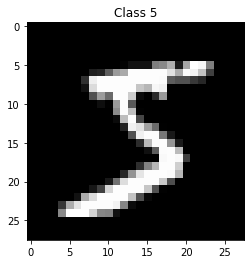

In [49]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [50]:
print(f"X-train Shape:{X_train.shape}")
print(f"Y-train Shape:{Y_train.shape}")


X-train Shape:(60000, 28, 28)
Y-train Shape:(60000, 10)


In [51]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the Pixel Intensity (0-255 => 0-1)
X_train/=255
X_test/=255

print(f"X-train Shape(after reshape):{X_train.shape}")

X-train Shape(after reshape):(60000, 28, 28, 1)


In [52]:
# Number of Output Classes
number_of_classes = 10

# Convert to One-hot Vector
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)


print(f"Before:{y_train[0]},After: {Y_train[0]}")

Before:5,After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [53]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, 3, 3, input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=1)
model.add(Conv2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(10))

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=3, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/step - loss: 0.1828 - acc: 0.9448 - val_loss: 0.0437 - val_acc: 0.9860
Epoch 2/3
60000/60000 [==============================] - 4s 72us/step - loss: 0.0563 - acc: 0.9825 - val_loss: 0.0337 - val_acc: 0.9881
Epoch 3/3
60000/60000 [==============================] - 4s 72us/step - loss: 0.0405 - acc: 0.9876 - val_loss: 0.0297 - val_acc: 0.9901


In [57]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 59us/step

Test accuracy:  0.9901
